In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [4]:
iris_data = pd.read_csv(r'../data/iris/iris_csv.csv')
iris_data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Within Cluster Sum of Square
WCSS = []

features = iris_data.iloc[:, [0,1,2, 3]].values

for i in range(1, 6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features)
    WCSS.append(kmeans.inertia_)

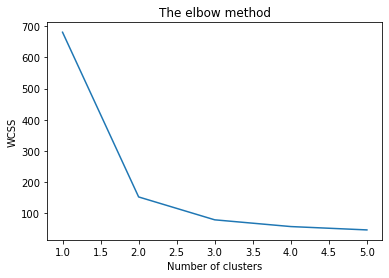

In [16]:
plt.plot(range(1,6), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


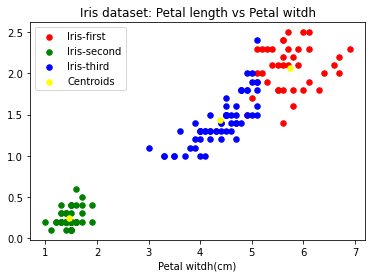

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(features)
print(kmeans.cluster_centers_)

# draw
plt.scatter(features[y_kmeans==0, 2], features[y_kmeans==0, 3], s=30, c='red', label='Iris-first')

plt.scatter(features[y_kmeans==1, 2], features[y_kmeans==1, 3], s=30, c='green', label='Iris-second')

plt.scatter(features[y_kmeans==2, 2], features[y_kmeans==2, 3], s=30, c='blue', label='Iris-third')


plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=30, c='yellow', label='Centroids')
plt.xlabel('Petal length(cm)')
plt.xlabel('Petal witdh(cm)')
plt.title('Iris dataset: Petal length vs Petal witdh')
plt.legend()
plt.show()